In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from joblib import dump, load

Basic Logistic Regression Model using simple nulldropped dataset

In [4]:
df = pd.read_csv('../Data/input_nulldrop_dummified.csv')
df.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,LastName_Yorkland,LastName_Youngrayes,CabinSector_B,CabinSector_C,CabinSector_D,CabinSector_E,CabinSector_F,CabinSector_G,CabinSector_T,CabinClass_S
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,...,0,0,1,0,0,0,0,0,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,...,0,0,0,0,0,0,1,0,0,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,...,0,0,0,0,0,0,0,0,0,1
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,...,0,0,0,0,0,0,0,0,0,1
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,...,0,0,0,0,0,0,1,0,0,1


Scale appropriate columns and generate combined dataframe

Using functions to pass data through a function transformer to allow their use in pipelines

In [34]:
def get_scaled_columns(df):
    return pd.DataFrame(df[to_scale])

In [31]:
def get_non_scaled_columns(df):
    return df[categoricals]

In [9]:
df.columns[:15]

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'TotalSpend',
       'FirstName', 'CabinRoom', 'HomePlanet_Europa', 'HomePlanet_Mars'],
      dtype='object')

In [17]:
to_scale = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend', 'CabinRoom']

In [22]:
df.loc[:, df.columns[13:]]

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,LastName_Acobsond,LastName_Adavisons,LastName_Adkinson,LastName_Admingried,...,LastName_Yorkland,LastName_Youngrayes,CabinSector_B,CabinSector_C,CabinSector_D,CabinSector_E,CabinSector_F,CabinSector_G,CabinSector_T,CabinClass_S
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6602,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6603,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6604,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
categoricals = df.columns[13:]

In [35]:
get_scaled_transformer = FunctionTransformer(get_scaled_columns)
get_non_scaled_transformer = FunctionTransformer(get_non_scaled_columns)

In [36]:
pipe_scaler =  Pipeline([
    ('scale_transform', get_scaled_transformer),
    ('ss', StandardScaler())
])

union = FeatureUnion([
    ('vect_pipe', pipe_scaler),
    ('other_cols', get_non_scaled_transformer)
])

union_res = union.fit_transform(df)

In [40]:
to_scale

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'TotalSpend',
 'CabinRoom']

In [43]:
X = pd.DataFrame(union_res, columns=to_scale+list(categoricals))

In [44]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend,CabinRoom,HomePlanet_Europa,HomePlanet_Mars,...,LastName_Yorkland,LastName_Youngrayes,CabinSector_B,CabinSector_C,CabinSector_D,CabinSector_E,CabinSector_F,CabinSector_G,CabinSector_T,CabinClass_S
0,0.695413,-0.345756,-0.285355,-0.309494,-0.273759,-0.269534,-0.523440,-1.167051,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.336769,-0.176748,-0.279993,-0.266112,0.206165,-0.230494,-0.266133,-1.167051,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.002842,-0.279083,1.845163,-0.309494,5.596357,-0.226058,3.106470,-1.167051,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.282540,-0.345756,0.479034,0.334285,2.636384,-0.098291,1.286096,-1.167051,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.887266,0.124056,-0.243650,-0.047470,0.220152,-0.267759,-0.142025,-1.165103,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [46]:
y = df['Transported']

In [56]:
X.loc[:, 'Age':'CabinRoom'].join(y).corr()['Transported']

Age            -0.082553
RoomService    -0.247291
FoodCourt       0.055025
ShoppingMall    0.011602
Spa            -0.219854
VRDeck         -0.207950
TotalSpend     -0.190992
CabinRoom      -0.046766
Transported     1.000000
Name: Transported, dtype: float64

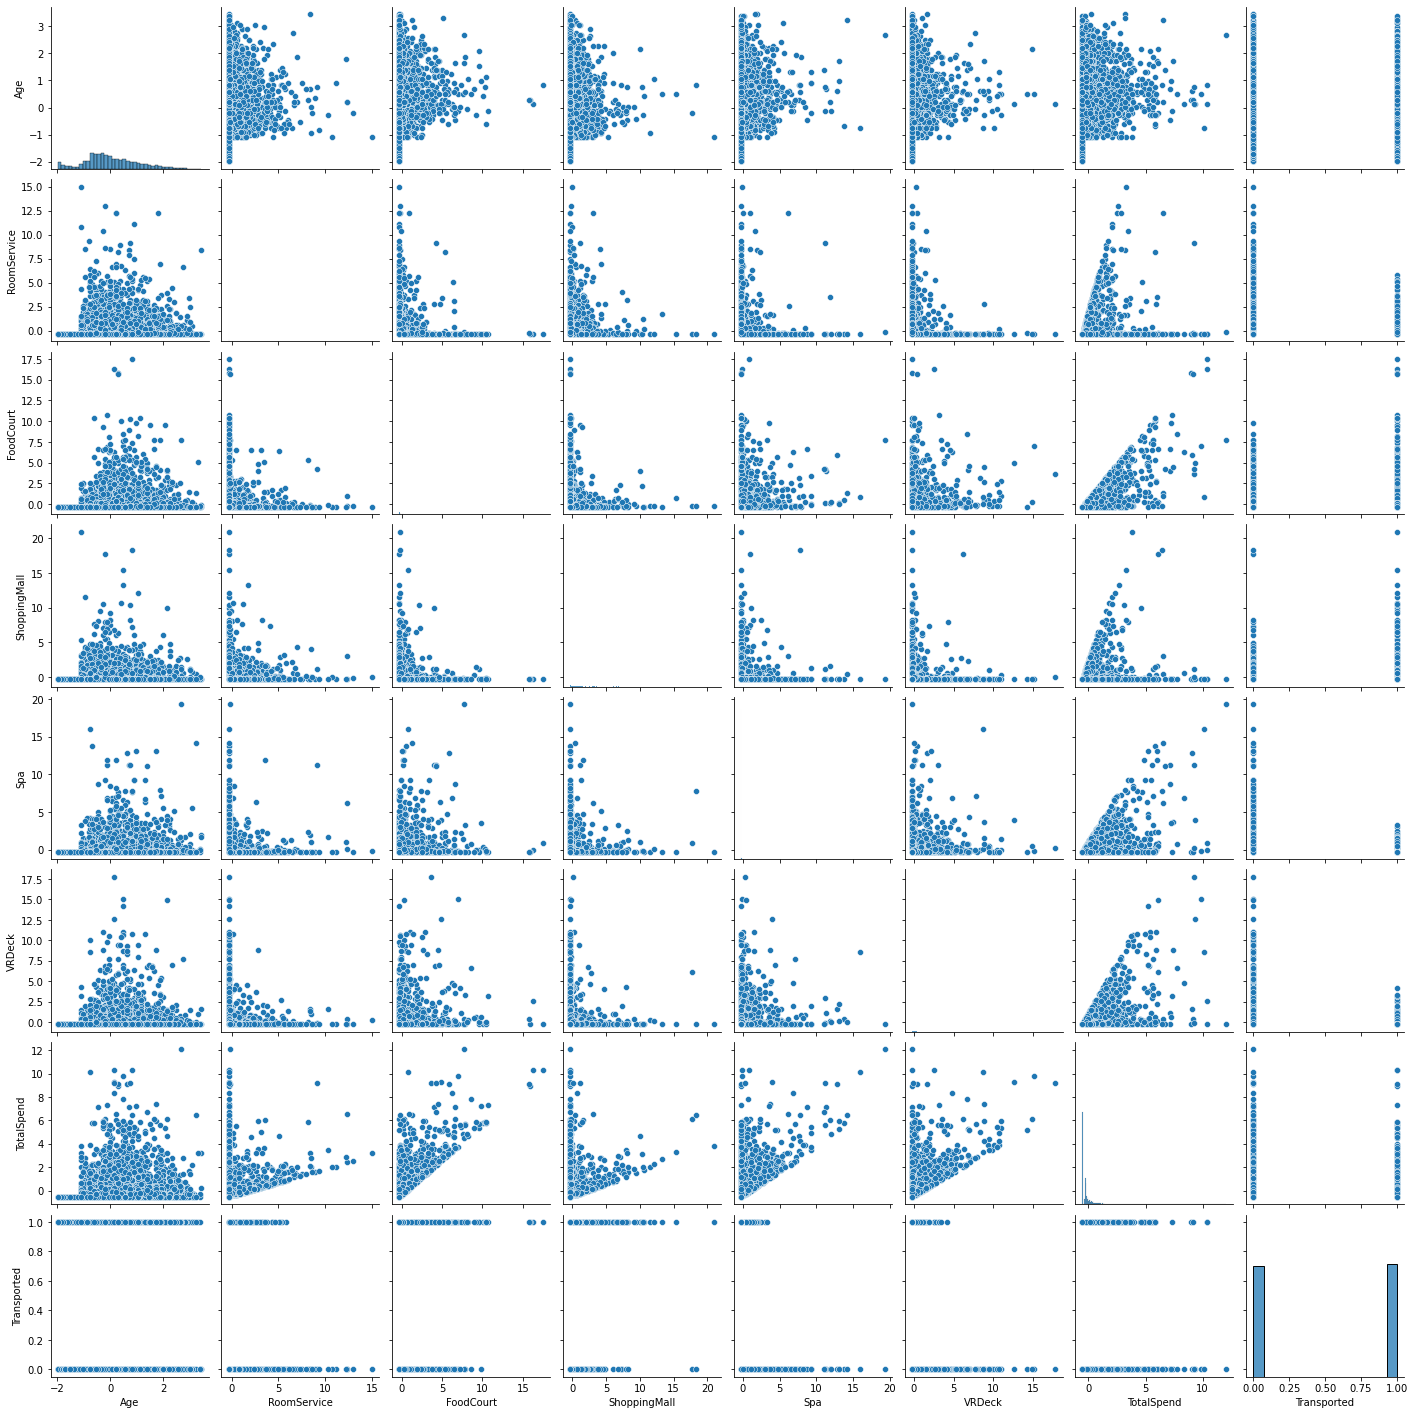

In [55]:
sns.pairplot(X.loc[:, 'Age':'TotalSpend'].join(y))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
logreg_cv = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear')
logreg_cv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')

In [60]:
print(logreg_cv.score(X_train, y_train))

0.7947113443681874


In [61]:
print(logreg_cv.score(X_test, y_test))

0.7929782082324455


In [65]:
logreg_cv.scores_

{1: array([[0.4974773 , 0.4974773 , 0.79212916, 0.80322906, 0.80625631,
         0.79515641, 0.76488396, 0.73763875, 0.71543895, 0.71543895],
        [0.4974773 , 0.4974773 , 0.75378406, 0.79515641, 0.790111  ,
         0.77194753, 0.75580222, 0.72250252, 0.70433905, 0.69525732],
        [0.4974773 , 0.4974773 , 0.74167508, 0.77800202, 0.78708375,
         0.77194753, 0.75882947, 0.74974773, 0.73662967, 0.71947528],
        [0.49848638, 0.49848638, 0.74268416, 0.78506559, 0.79515641,
         0.77699294, 0.75277497, 0.7184662 , 0.70332997, 0.69323915],
        [0.4979798 , 0.4979798 , 0.76262626, 0.78989899, 0.78888889,
         0.77373737, 0.73434343, 0.71313131, 0.69494949, 0.68686869]])}

In [83]:
X.columns[:15]

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'TotalSpend', 'CabinRoom', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_True', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_True', 'LastName_Acobsond'],
      dtype='object')

In [82]:
logreg_cv.coef_[0][:15]

array([-0.13867894, -0.8567476 ,  0.870489  ,  0.31594878, -2.32010312,
       -2.0953475 ,  0.        ,  0.0382063 ,  1.41700634,  0.48204085,
        1.37056269, -0.46525269, -0.64071525, -0.37264983,  0.        ])

In [85]:
logreg_cv_coefficients = pd.DataFrame(logreg_cv.coef_[0], X.columns)

In [91]:
sorted_lrcv_coefs = logreg_cv_coefficients.sort_values(by=0, ascending=False)

In [92]:
sorted_lrcv_coefs.iloc[:10, :]

,0
CabinSector_C,1.590955
HomePlanet_Europa,1.417006
CryoSleep_True,1.370563
FoodCourt,0.870489
CabinClass_S,0.582389
CabinSector_B,0.545008
HomePlanet_Mars,0.482041
ShoppingMall,0.315949
LastName_Domington,0.280771
CabinRoom,0.038206


In [93]:
sorted_lrcv_coefs.iloc[-10:, :]

,0
LastName_Matts,-0.245705
LastName_Mcbriddley,-0.283546
CabinSector_E,-0.345103
VIP_True,-0.372650
CabinSector_G,-0.425467
Destination_PSO J318.5-22,-0.465253
Destination_TRAPPIST-1e,-0.640715
RoomService,-0.856748
VRDeck,-2.095347
Spa,-2.320103


In [95]:
dump(logreg_cv, '../Output/logreg_cv1.joblib')

['../Output/logreg_cv1.joblib']